#**🎮 게임 판매실적 분석 🎮**  

게임 판매량 분석을 통해 과거와 최근 트랜드를 살펴보고, 추 후 게임 개발 방항성을 위하여 분석을 진행  
**Focus:**
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

**데이터 변수 설명**

*   Name : 게임의 이름 
*   Platform : 게임이 지원되는 플랫폼 
*   Year : 게임이 출시된 연도  
*   Genre : 게임의 장르  
*   Publisher : 게임제작사  
*   NA_Sales : 북미지역 판매량  
*   EU_Sales : 유럽지역 판매량 
*   JP_Sales : 일본지역 판매량
*   Other_Sales : 기타지역 판매량
*   Global_Sales : 총 판매량

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodeStates/Sec.1/Project/vgames2.csv')
df = data.copy().iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## 1. 지역별 게임 트랜드

In [3]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 데이터에서 중복값을 제거
df = df.drop_duplicates(subset=['Name', 'Platform', 'Year']).reset_index(drop=True)

# 판매량(Sales) 데이터에서 문자 제거
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[sales] = df[sales].replace('[Mm]', '', regex=True)

# 장르에 결측치인 데이터 제거
df = df.dropna(subset=['Genre'])

# 게임제작사가 결측치인 데이터는 불분명으로 분류
df.loc[df['Publisher'].isna() == True, ['Publisher']] = 'Unknown'

# 판매량(Sales) 단위 백만(M)으로 통일
def convert(value):
    value = value.replace('K', '')
    return float(value) / 1000

df['NA_Sales'] = df.apply(lambda df:
    convert(df.NA_Sales) if 'K' in df.NA_Sales else float(df.NA_Sales), axis=1)
df['EU_Sales'] = df.apply(lambda df:
    convert(df.EU_Sales) if 'K' in df.EU_Sales else float(df.EU_Sales), axis=1)
df['JP_Sales'] = df.apply(lambda df:
    convert(df.JP_Sales) if 'K' in df.JP_Sales else float(df.JP_Sales), axis=1)
df['Other_Sales'] = df.apply(lambda df:
    convert(df.Other_Sales) if 'K' in df.Other_Sales else float(df.Other_Sales), axis=1)

# 총 판매량 변수 생성
df['Global_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1).round(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
df.shape

(16546, 10)

In [6]:
# 지역별 선호하는 게임 장르
df_genre = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum().sort_values('NA_Sales', ascending=False).reset_index(drop=False)
df_genre1 = df_genre.sort_values('EU_Sales', ascending=False).reset_index(drop=True)
df_genre2 = df_genre.sort_values('JP_Sales', ascending=False).reset_index(drop=True)
df_genre3 = df_genre.sort_values('Other_Sales', ascending=False).reset_index(drop=True)
df_genre4 = df_genre.sort_values('Global_Sales', ascending=False).reset_index(drop=True)

df_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,874.81,522.16,157.90,186.45,1741.32
1,Sports,680.52,376.47,135.37,134.67,1327.03
2,Shooter,581.92,313.05,38.26,102.65,1035.88
3,Platform,446.44,201.61,130.65,51.53,830.23
4,Misc,408.05,212.36,105.27,74.04,799.72
5,Racing,357.19,237.10,56.40,77.10,727.79
6,Role-Playing,319.54,183.58,344.95,56.96,905.03
7,Fighting,223.20,101.22,87.34,36.64,448.40
8,Simulation,182.96,113.35,63.70,31.48,391.49
9,Puzzle,123.35,50.73,56.87,12.52,243.47


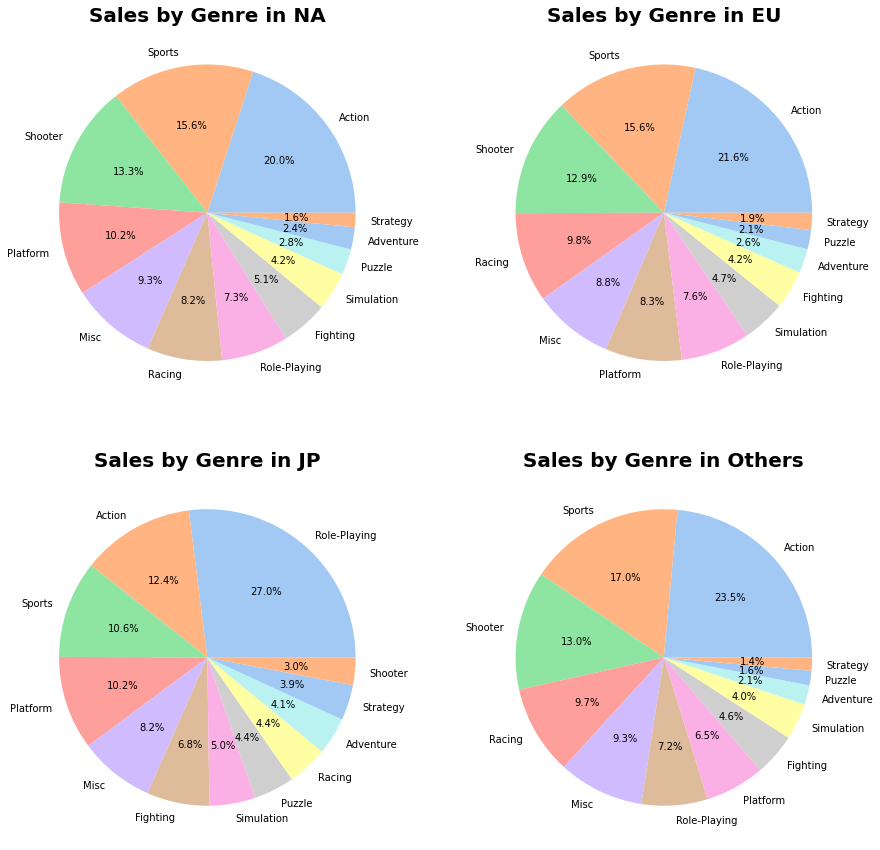

In [7]:
# 지역별 게임 장르 판매량 비율 그래프
fig, ax= plt.subplots(2,2, figsize=(15,15))

ax[0,0].pie(df_genre.NA_Sales,
            labels = df_genre.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'))
ax[0,0].set_title('Sales by Genre in NA', fontdict={'fontweight':'bold', 'fontsize':20})

ax[0,1].pie(df_genre1.EU_Sales, 
            labels = df_genre1.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'))
ax[0,1].set_title('Sales by Genre in EU', fontdict={'fontweight':'bold', 'fontsize':20})

ax[1,0].pie(df_genre2.JP_Sales, 
            labels = df_genre2.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'))
ax[1,0].set_title('Sales by Genre in JP', fontdict={'fontweight':'bold', 'fontsize':20})

ax[1,1].pie(df_genre3.Other_Sales, 
            labels = df_genre3.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'))
ax[1,1].set_title('Sales by Genre in Others', fontdict={'fontweight':'bold', 'fontsize':20});

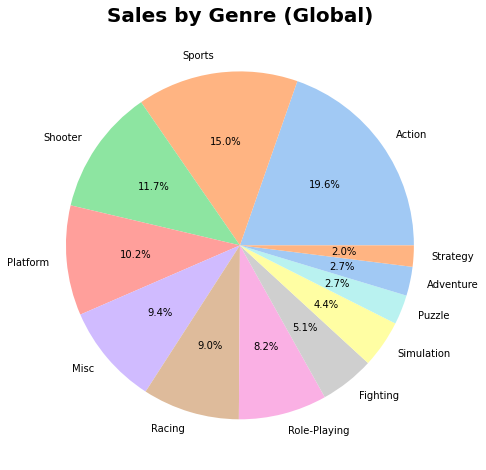

In [8]:
# 전세계 장르별 총 판매량 비율 그래프
f, axs = plt.subplots(figsize=(20,8))

plt.pie(df_genre4.Global_Sales,
            labels = df_genre.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'))
plt.title('Sales by Genre (Global)', fontdict={'fontweight':'bold', 'fontsize':20});

## 2. 연도별 게임 트랜드


In [9]:
# 정제된 기존 데이터의 수/(행,열)
df.shape

(16546, 10)

In [10]:
# 기존 데이터를 보존 시키기 위해 새로운 데이터셋 생성
df1 = df.copy()

# 연도 결측치 제거
df1 = df1.dropna(subset=['Year'])
df1.shape

(16276, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


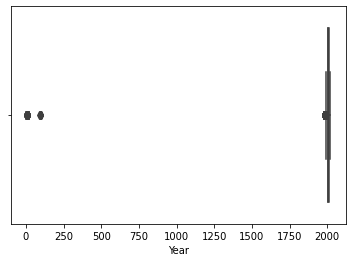

In [11]:
# 그래프를 통해 연도 변수의 데이터 분포 확인
sns.boxplot(df1.Year);

In [12]:
# 연도 데이터의 이상치 제거
df1 = df[df.Year > 1000].reset_index(drop=True)
df1.Year = df1.Year.astype(int)
df1.shape

(16176, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


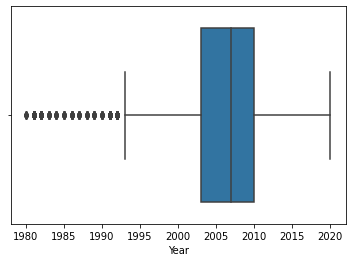

In [13]:
# 이상치 제거 후 연도 변수의 데이터 분포
sns.boxplot(df1.Year);

In [14]:
df1.Year.describe()

count    16176.000000
mean      2006.406899
std          5.827334
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [15]:
# 연도별 각 장르들의 판매량을 합산
action = df1.loc[df1['Genre'] == 'Action', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
sports = df1.loc[df1['Genre'] == 'Sports', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
misc = df1.loc[df1['Genre'] == 'Misc', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
rpg = df1.loc[df1['Genre'] == 'Role-Playing', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
fps = df1.loc[df1['Genre'] == 'Shooter', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
adv = df1.loc[df1['Genre'] == 'Adventure', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
race = df1.loc[df1['Genre'] == 'Racing', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
pltm = df1.loc[df1['Genre'] == 'Platform', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
sim = df1.loc[df1['Genre'] == 'Simulation', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
fight = df1.loc[df1['Genre'] == 'Fighting', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
strat = df1.loc[df1['Genre'] == 'Strategy', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)
puzzle = df1.loc[df1['Genre'] == 'Puzzle', ['Year', 'Global_Sales']].groupby('Year').sum().reset_index(drop=False)

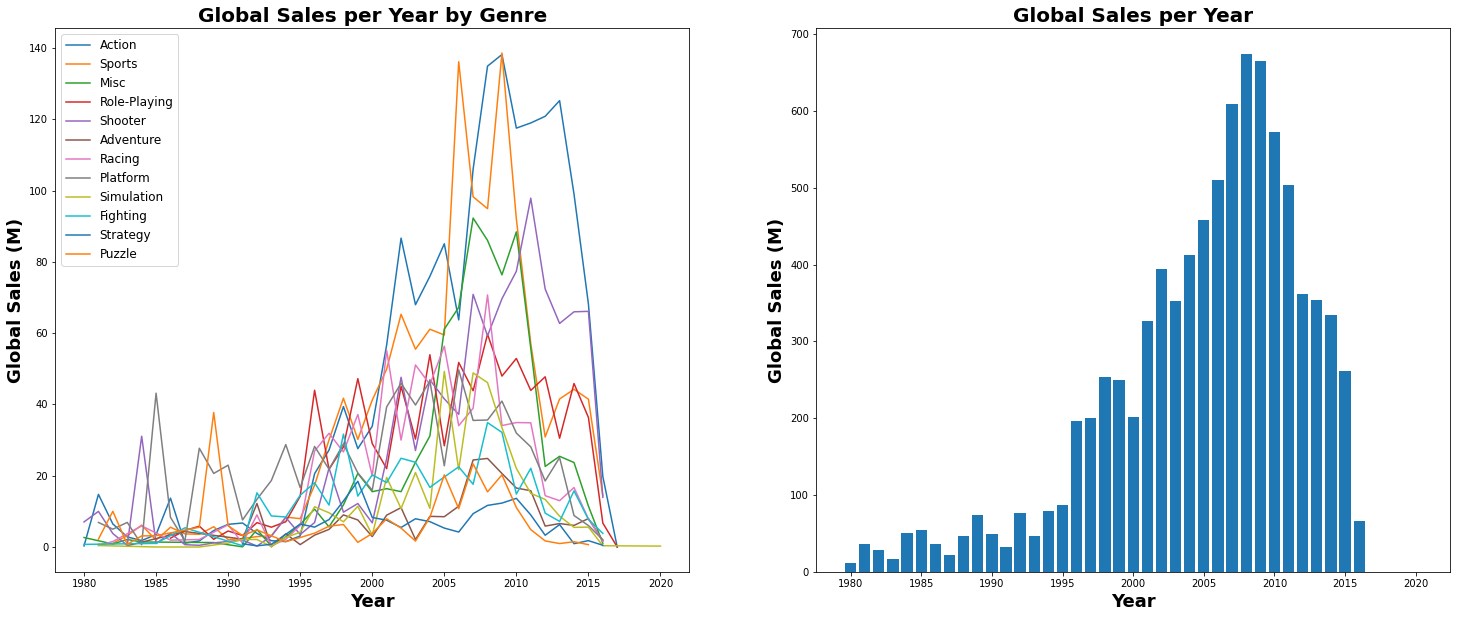

In [16]:
f, axs = plt.subplots(1,2,figsize=(25,10))

# 연도별 장르의 따른 판매량
plt.subplot(1,2,1)
plt.plot(action.Year, action.Global_Sales)
plt.plot(sports.Year, sports.Global_Sales)
plt.plot(misc.Year, misc.Global_Sales)
plt.plot(rpg.Year, rpg.Global_Sales)
plt.plot(fps.Year, fps.Global_Sales)
plt.plot(adv.Year, adv.Global_Sales)
plt.plot(race.Year, race.Global_Sales)
plt.plot(pltm.Year, pltm.Global_Sales)
plt.plot(sim.Year, sim.Global_Sales)
plt.plot(fight.Year, fight.Global_Sales)
plt.plot(strat.Year, strat.Global_Sales)
plt.plot(puzzle.Year, puzzle.Global_Sales)

plt.title('Global Sales per Year by Genre', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.legend(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'], fontsize=12)


# 연도별 총 판매량
plt.subplot(1,2,2)
df_year = df1.groupby('Year').sum().reset_index(drop=False)

plt.bar(df_year['Year'], df_year['Global_Sales'])

plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':18, 'fontweight':'bold'})

plt.show()

In [17]:
df1.loc[:, ~df.columns.isin(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])].sort_values('Year', ascending=False)

,Name,Platform,Year,Genre,Publisher,Global_Sales
6736,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.29
14850,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.01
9865,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.03
5173,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.01
4927,Lego Star Wars: The Force Awakens,WiiU,2016,Action,Warner Bros. Interactive Entertainment,0.09
...,...,...,...,...,...,...
9003,Bridge,2600,1980,Misc,Activision,0.27
14637,Missile Command,2600,1980,Shooter,Atari,2.76
9878,Defender,2600,1980,Misc,Atari,1.05
7139,Checkers,2600,1980,Misc,Atari,0.23


## 3. 최대 판매량의 게임들의 특징

### 최대 판매량별 게임 개별 순위

In [18]:
df2 = df1.copy()
df2.sort_values('Global_Sales', ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### 최대 판매량별 게임 플랫폼 순위

In [19]:
# 플랫폼별 총 판매량별 기준 순위
platform = df2.loc[:, df.columns!='Year'].groupby('Platform').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PS2,562.99,328.80,133.79,186.74,1212.32
1,X360,587.58,274.41,12.14,83.59,957.72
2,PS3,387.37,339.39,78.12,140.36,945.24
3,Wii,494.60,260.55,65.74,78.41,899.30
4,DS,381.40,190.61,168.73,59.33,800.07
5,PS,333.10,211.29,138.67,40.42,723.48
6,GBA,183.83,74.48,46.51,7.61,312.43
7,PSP,104.68,66.59,74.85,41.04,287.16
8,PS4,93.04,120.29,13.85,41.97,269.15
9,GB,113.64,47.51,84.92,8.16,254.23


### 최대 판매량별 게임제작사 순위

In [20]:
# 게임제작사별 총 판매량액 기준 순위
publisher = df2.loc[:, df.columns!='Year'].groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,802.57,407.06,441.58,92.85,1744.06
1,Electronic Arts,578.58,364.75,13.98,126.78,1084.09
2,Activision,424.94,213.09,6.54,74.51,719.08
3,Sony Computer Entertainment,259.94,183.42,73.26,78.30,594.92
4,Ubisoft,251.72,162.92,7.33,50.06,472.03
5,Take-Two Interactive,218.72,116.60,5.82,54.73,395.87
6,THQ,207.62,94.22,5.01,32.00,338.85
7,Konami Digital Entertainment,88.45,68.52,90.76,29.88,277.61
8,Sega,108.51,81.19,54.87,24.21,268.78
9,Namco Bandai Games,68.74,42.33,125.22,14.54,250.83


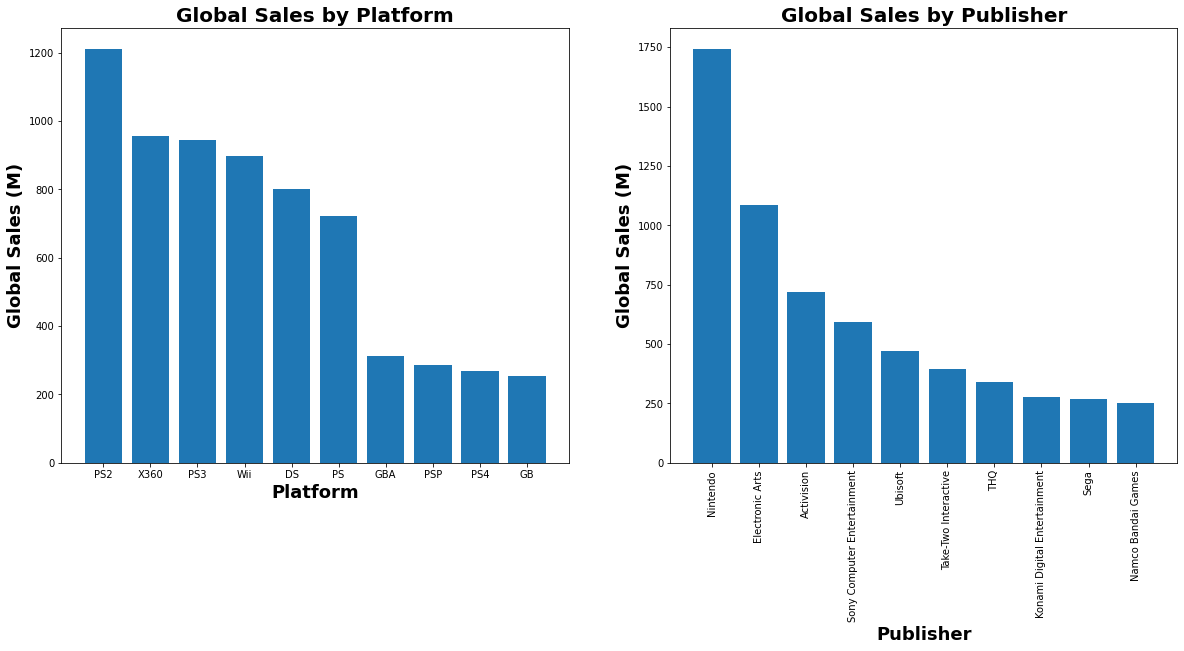

In [21]:
# 게임 플랫폼과 제작사별 총 판매량 시각화
f, axs = plt.subplots(1,2,figsize=(20,8))

# 플랫폼별 역대 총 판매량 그래프
plt.subplot(1,2,1)
plt.bar(platform.Platform, platform.Global_Sales)
plt.title('Global Sales by Platform', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Platform', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':18, 'fontweight':'bold'});

# 게임제작사별 역대 판매량 그래프
plt.subplot(1,2,2)
plt.bar(publisher.Publisher, publisher.Global_Sales)
plt.title('Global Sales by Publisher', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Publisher', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(rotation = 90);

In [22]:
# 전세계 총 판매량에서 미국의 총 판매량의 비율
NA_Sales_total = df2['NA_Sales'].sum()
Global_Sales_total = df2['Global_Sales'].sum()
percentage_NA = (NA_Sales_total / Global_Sales_total) * 100
print(percentage_NA)

49.24528995665703


##정리:


*   제일 인기 있는 게임 장르: 액션, 스포츠, 슈터
*   최대 인기 게임 플랫폼: PS2, Xbox 360, PS3
*   최대 인기 게임 제작사: Nintendo, Electronic Arts, Activision
*   제일 수익성이 있는 지역: 북미  



> 하지만 궁극적으로 연도별 게임 총 판매량을 고려했을 시 전체적으로 2010년 이 후로 하락세이므로 이 분석으로 발견한 인기있는 게임 플랫폼이나 게임 장르에 개발하는 것은 적합하다고 생각되지 않습니다. 이 하락세의 한 가지 이유은 스마트폰이라고 생각합니다. 스마트폰은 빠르게 발전하고 있으며 휴대성이나 기능도 점점 좋아지고 있어 더 많은 사람들이 쉽게 즐길 수 있는 모바일 게임을 더 많이 사용한다고 생각됩니다. 따라서 더 정확한 분석을 위해 추 후에 모바일 게임의 판매와 판매량도 확인하는 것이 필요합니다.

